In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crypto.csv', header=[0,1], index_col=0, parse_dates=[0])
df.head(2)

Price          close                                                   \
Ticker           ada          btc      doge         eth sol       xrp   
Date                                                                    
2020-01-01  0.033458  7200.174316  0.002033  130.802002 NaN  0.192667   
2020-01-02  0.032751  6985.470215  0.002009  127.410179 NaN  0.188043   

Price           High                                     ...      Open  \
Ticker           ada          btc      doge         eth  ...      doge   
Date                                                     ...             
2020-01-01  0.033813  7254.330566  0.002052  132.835358  ...  0.002028   
2020-01-02  0.033507  7212.155273  0.002110  130.820038  ...  0.002034   

Price                                   volume                         \
Ticker             eth sol       xrp       ada          btc      doge   
Date                                                                    
2020-01-01  129.630661 NaN  0.192912  22948374  18565664997  51180941   
2020-01-02  130.820038 NaN  0.192708  20843934  20802083465  65071106   

Price                                   
Ticker             eth sol         xrp  
Date                                    
2020-01-01  7935230330 NaN  1041134003  
2020-01-02  8032709256 NaN  1085351426  

[2 rows x 30 columns]

In [3]:
close = df['close'].dropna()
close.head(2)

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-04-10,0.033215,6865.493164,0.001968,158.412445,0.951054,0.187464
2020-04-11,0.033354,6859.083008,0.001990,158.216019,0.776819,0.188063


In [4]:
pct_change = close.pct_change()
pct_change.head()

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-11,0.004185,-0.000934,0.011179,-0.001240,-0.183202,0.003195
2020-04-12,0.013552,0.016330,0.000000,0.018496,0.136052,0.011018
2020-04-13,-0.020677,-0.018082,-0.015578,-0.030177,-0.118611,-0.012638
2020-04-14,-0.004017,-0.000381,0.002552,0.008426,-0.149013,-0.012768


In [5]:
pct_change = pct_change.iloc[1:]
pct_change.head()

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-04-11,0.004185,-0.000934,0.011179,-0.001240,-0.183202,0.003195
2020-04-12,0.013552,0.016330,0.000000,0.018496,0.136052,0.011018
2020-04-13,-0.020677,-0.018082,-0.015578,-0.030177,-0.118611,-0.012638
2020-04-14,-0.004017,-0.000381,0.002552,0.008426,-0.149013,-0.012768
2020-04-15,-0.033693,-0.029276,-0.012220,-0.027345,-0.023075,-0.021933


In [6]:
columns = [col for col in close.columns]
columns

['ada', 'btc', 'doge', 'eth', 'sol', 'xrp']

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(close)
data_scaled

array([[-1.11632936, -1.44328459, -1.149731  , -1.81237982, -1.02876658,
        -0.9098817 ],
       [-1.11608306, -1.44355807, -1.14952045, -1.81256172, -1.03121907,
        -0.90880868],
       [-1.11528212, -1.43877931, -1.14952045, -1.8098518 , -1.02973143,
        -0.90509694],
       ...,
       [ 0.01899531,  1.78776065,  0.45425411, -0.26693318,  0.71151246,
         2.58774442],
       [-0.00441971,  1.77653731,  0.42318822, -0.28647382,  0.71228641,
         2.58092625],
       [-0.00311025,  1.7856841 ,  0.42697812, -0.27048941,  0.71301129,
         2.4980824 ]], shape=(1817, 6))

In [9]:
pct_change_scaled = scaler.fit_transform(pct_change)

In [10]:
data_scaled[0]

array([-1.11632936, -1.44328459, -1.149731  , -1.81237982, -1.02876658,
       -0.9098817 ])

In [11]:
pct_change_scaled[0]

array([ 0.02152935, -0.08848749,  0.04991941, -0.083248  , -2.79684853,
        0.00542912])

In [12]:
close_norm = pd.DataFrame(data_scaled)
close.head()

Ticker,ada,btc,doge,eth,sol,xrp
Date,,,,,,
2020-04-10,0.033215,6865.493164,0.001968,158.412445,0.951054,0.187464
2020-04-11,0.033354,6859.083008,0.001990,158.216019,0.776819,0.188063
2020-04-12,0.033806,6971.091797,0.001990,161.142426,0.882507,0.190135
2020-04-13,0.033107,6845.037598,0.001959,156.279556,0.777832,0.187732
2020-04-14,0.032974,6842.427734,0.001964,157.596390,0.661925,0.185335


In [13]:
pct_change_norm = pd.DataFrame(pct_change_scaled)
pct_change_norm.head()

,0,1,2,3,4,5
0,0.021529,-0.088487,0.049919,-0.083248,-2.796849,0.005429
1,0.195781,0.455979,-0.052884,0.394140,1.949421,0.141461
2,-0.440972,-0.629330,-0.196142,-0.783200,-1.836592,-0.269921
3,-0.131055,-0.071066,-0.029412,0.150560,-2.288567,-0.272178
4,-0.683118,-0.982351,-0.165262,-0.714690,-0.416285,-0.431558


In [14]:
close_norm.columns = ['ada', 'btc', 'doge', 'eth', 'sol', 'xrp']
close_norm.head()

,ada,btc,doge,eth,sol,xrp
0,-1.116329,-1.443285,-1.149731,-1.812380,-1.028767,-0.909882
1,-1.116083,-1.443558,-1.149520,-1.812562,-1.031219,-0.908809
2,-1.115282,-1.438779,-1.149520,-1.809852,-1.029731,-0.905097
3,-1.116521,-1.444157,-1.149817,-1.814355,-1.031205,-0.909402
4,-1.116756,-1.444269,-1.149769,-1.813136,-1.032836,-0.913696


In [15]:
pct_change_norm.columns = ['ada', 'btc', 'doge', 'eth', 'sol', 'xrp']
pct_change_norm.head()

,ada,btc,doge,eth,sol,xrp
0,0.021529,-0.088487,0.049919,-0.083248,-2.796849,0.005429
1,0.195781,0.455979,-0.052884,0.394140,1.949421,0.141461
2,-0.440972,-0.629330,-0.196142,-0.783200,-1.836592,-0.269921
3,-0.131055,-0.071066,-0.029412,0.150560,-2.288567,-0.272178
4,-0.683118,-0.982351,-0.165262,-0.714690,-0.416285,-0.431558


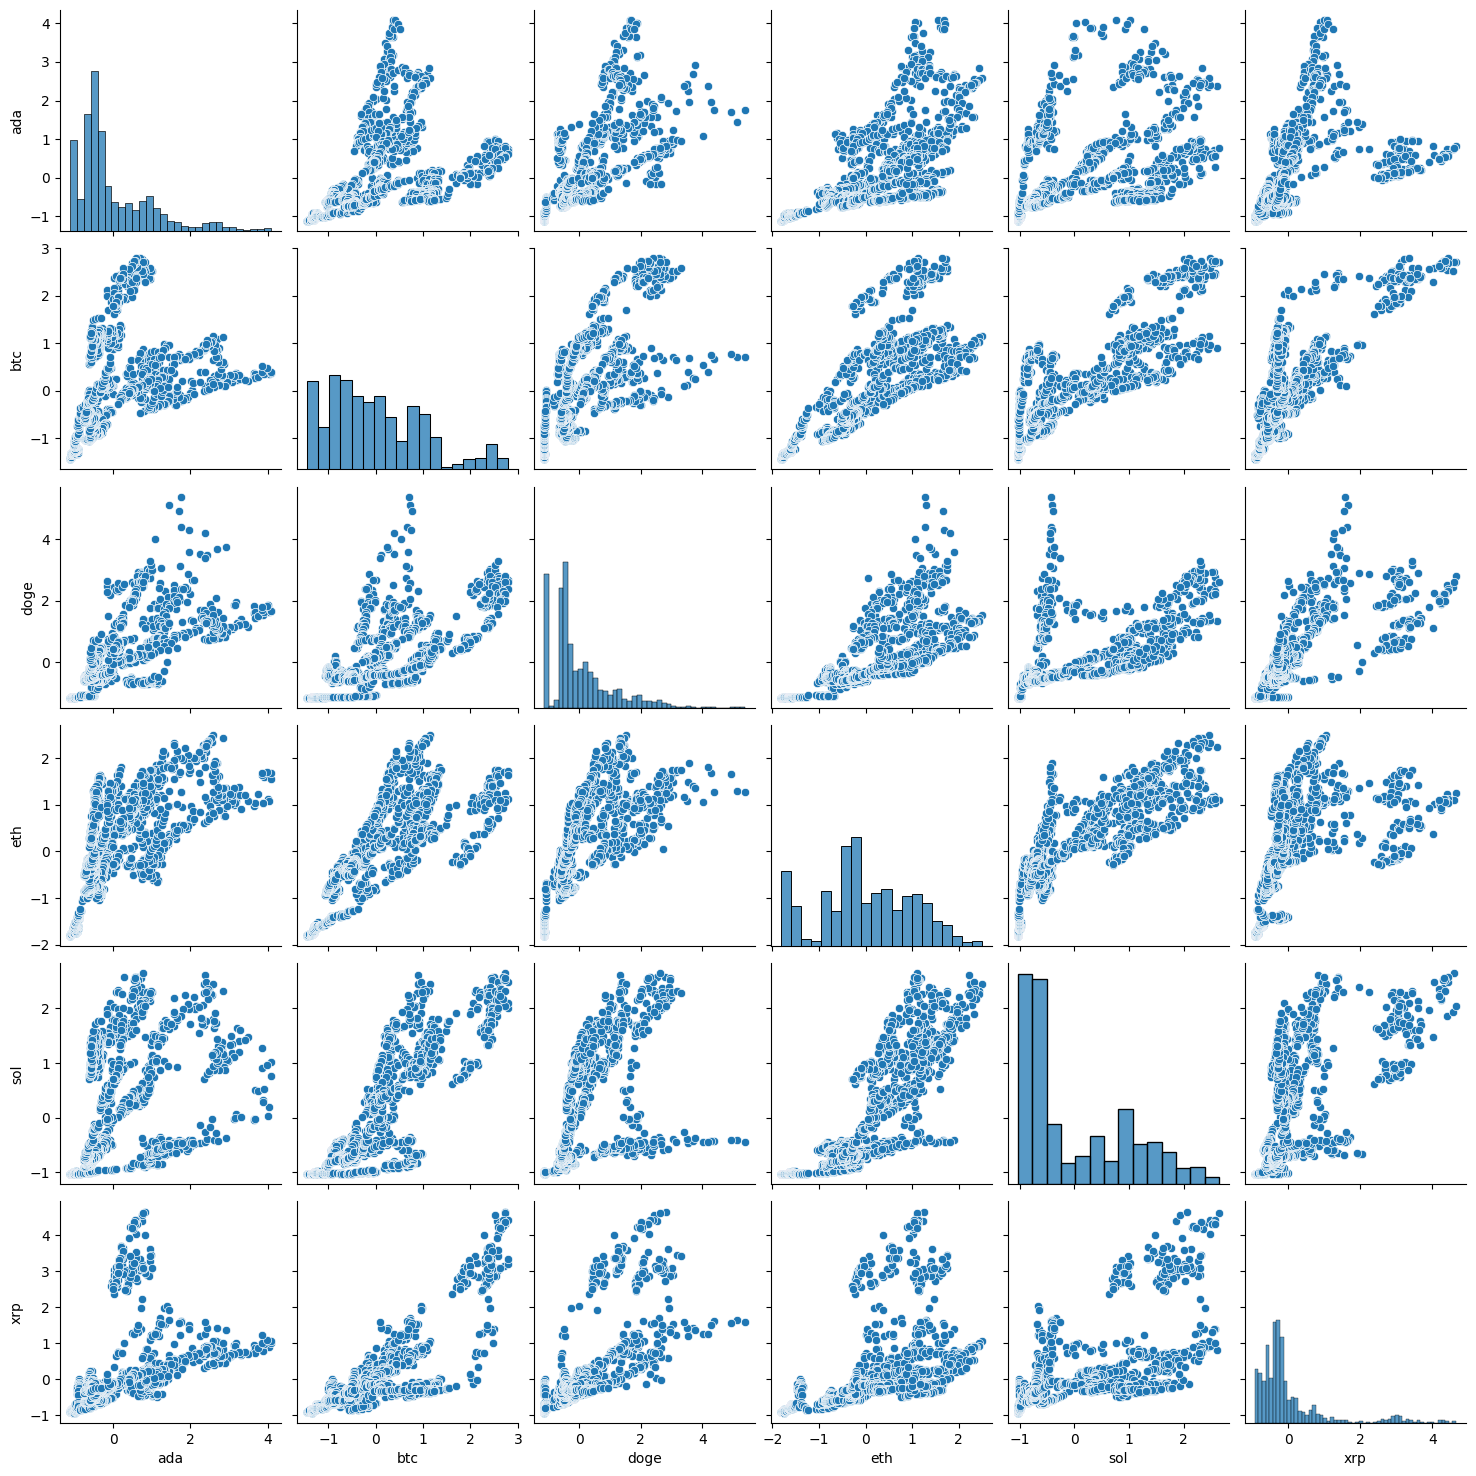

In [16]:
sns.pairplot(data=close_norm)

<Axes: >

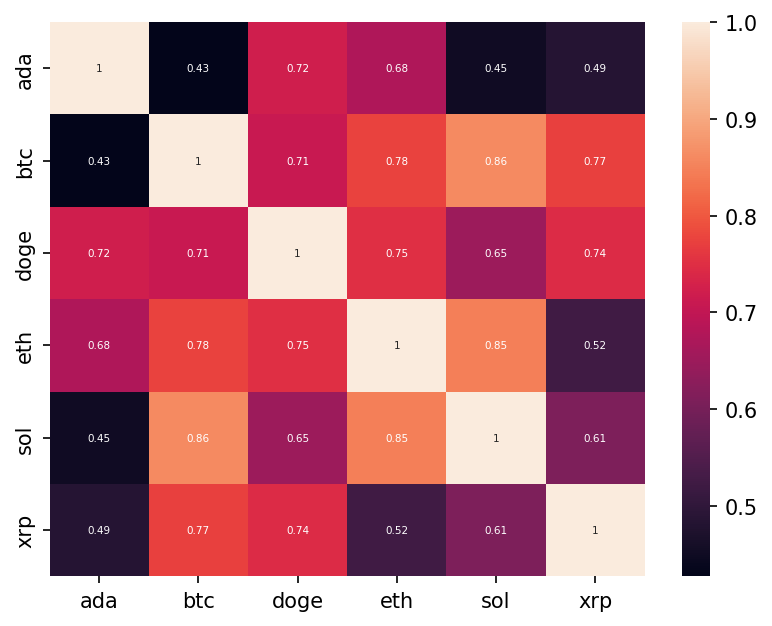

In [17]:
plt.figure(dpi=150)
sns.heatmap(data=close_norm.corr(), annot=True, annot_kws={'size': 5})

<Axes: xlabel='Ticker', ylabel='Ticker'>

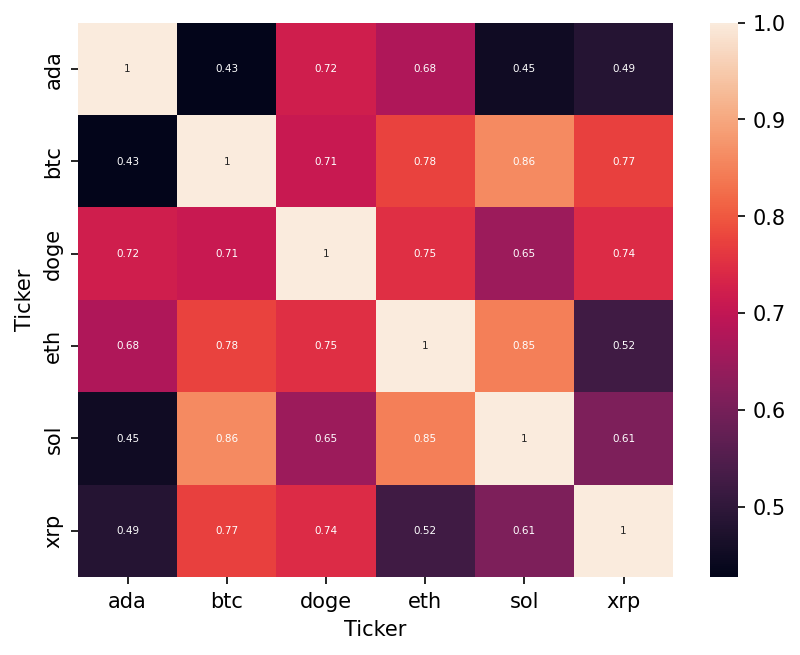

In [18]:
plt.figure(dpi=150)
sns.heatmap(data=close.corr(), annot=True, annot_kws={'size': 5})

<Axes: xlabel='Ticker', ylabel='Ticker'>

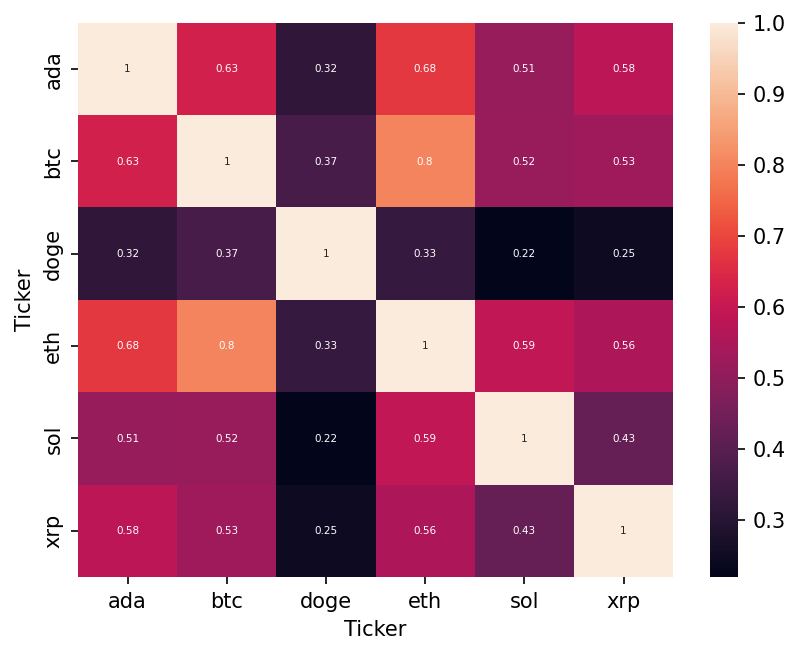

In [19]:
plt.figure(dpi=150)
sns.heatmap(data=pct_change.corr(), annot=True, annot_kws={'size': 5})

<Axes: >

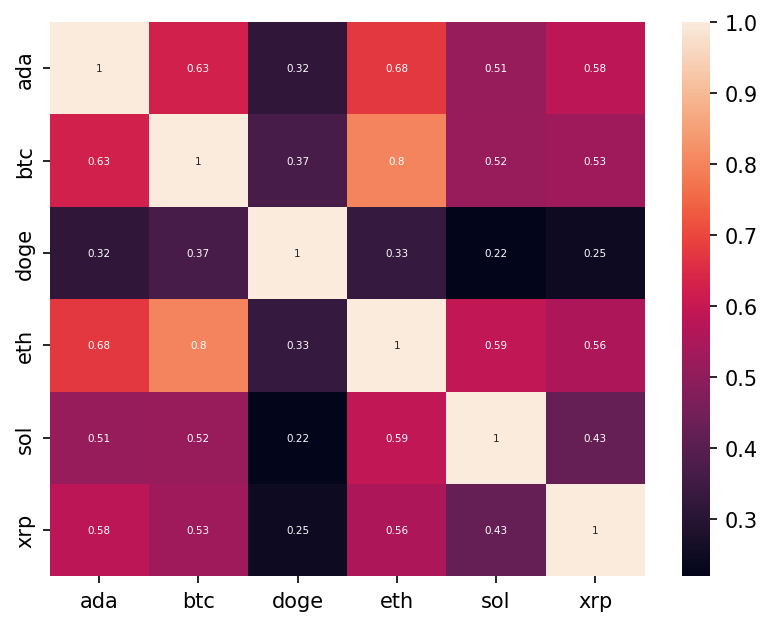

In [20]:
plt.figure(dpi=150)
sns.heatmap(data=pct_change_norm.corr(), annot=True, annot_kws={'size': 5})

In [25]:
pct_change_lagged = pct_change_norm
for col in ['ada', 'doge', 'eth', 'sol', 'xrp']:
    pct_change_lagged[col] = pct_change_norm[col].shift(14)

pct_change_lagged = pct_change_lagged.dropna()
pct_change_lagged.head()

,ada,btc,doge,eth,sol,xrp
29,0.021529,-2.812067,0.049919,-0.083248,-2.796849,0.005429
30,0.195781,-0.615994,-0.052884,0.394140,1.949421,0.141461
31,-0.440972,0.684087,-0.196142,-0.783200,-1.836592,-0.269921
32,-0.131055,1.608450,-0.029412,0.150560,-2.288567,-0.272178
33,-0.683118,1.518674,-0.165262,-0.714690,-0.416285,-0.431558


<Axes: >

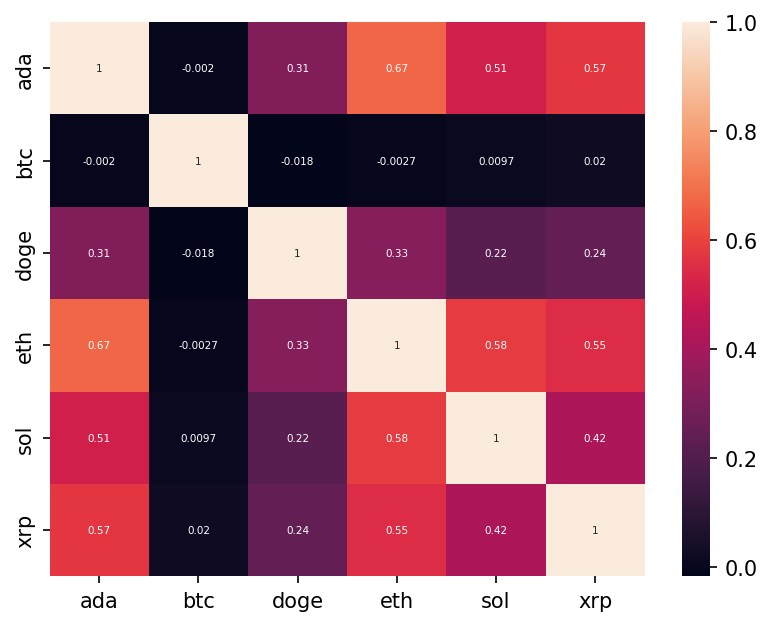

In [26]:
plt.figure(dpi=150)
sns.heatmap(data=pct_change_lagged.corr(), annot=True, annot_kws={'size': 5})

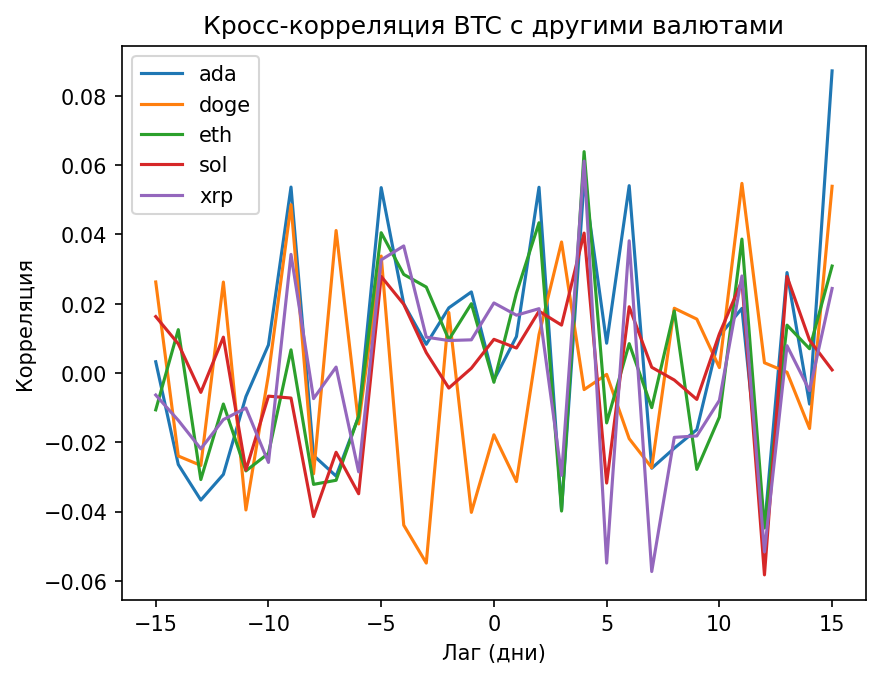

In [34]:
# Анализ для каждой валюты
currencies = ['ada', 'doge', 'eth', 'sol', 'xrp']
lags = range(-15, 16)

plt.figure(dpi=150)
for curr in currencies:
    cc = cross_correlation(pct_change_lagged['btc'], pct_change_lagged[curr], lag_max=15)
    plt.plot(lags, cc, label=curr)
plt.title('Кросс-корреляция BTC с другими валютами')
plt.xlabel('Лаг (дни)')
plt.ylabel('Корреляция')
plt.legend()
plt.show()